In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
df=pd.read_csv('anime.csv')

In [57]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Toy Story (1995),"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Jumanji (1995),"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Grumpier Old Men (1995),"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Waiting to Exhale (1995),"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Father of the Bride Part II (1995),"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [58]:
df.keys

<bound method NDFrame.keys of        anime_id                                               name  \
0         32281                                   Toy Story (1995)   
1          5114                                     Jumanji (1995)   
2         28977                            Grumpier Old Men (1995)   
3          9253                           Waiting to Exhale (1995)   
4          9969                 Father of the Bride Part II (1995)   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatu

In [59]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [62]:
df.count()

anime_id    12294
name        12293
genre       12232
type        12269
episodes    12294
rating      12064
members     12294
dtype: int64

In [65]:
df.count()

anime_id    12294
name        12293
genre       12232
type        12269
episodes    12294
rating      12064
members     12294
dtype: int64

In [66]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [67]:
df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12293 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [69]:
df.isnull().sum()

anime_id      0
name          1
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

<Axes: >

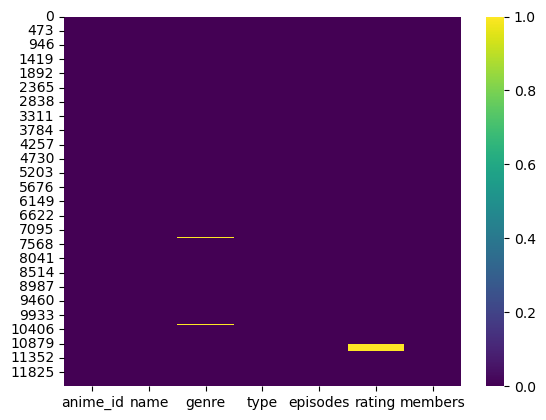

In [70]:
sns.heatmap(df.isna(),cmap='viridis')

In [71]:
df['genre']=df['genre'].fillna('general')

<Axes: >

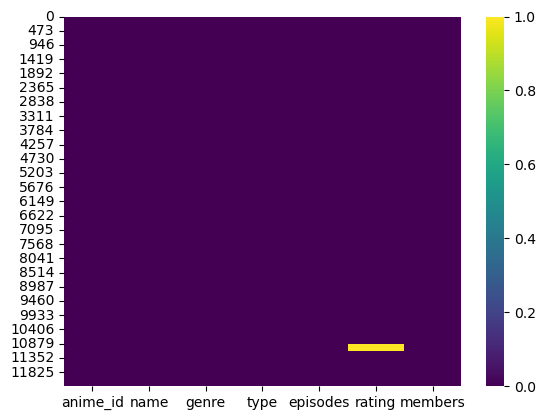

In [72]:
sns.heatmap(df.isna(),cmap='viridis')

In [73]:
df['rating'].describe()

count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

In [74]:
df['rating'].mean()

6.473901690981432

In [75]:
df['rating'].median()

6.57

In [76]:
df['rating']=df['rating'].fillna(df['rating'].median())

<Axes: >

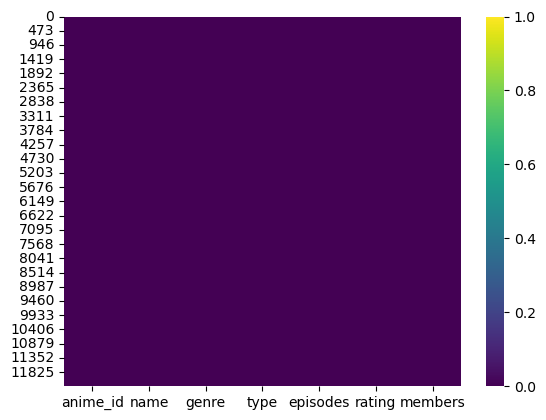

In [77]:
sns.heatmap(df.isna(),cmap='viridis')

In [78]:
df.isnull().sum()

anime_id     0
name         1
genre        0
type        25
episodes     0
rating       0
members      0
dtype: int64

In [79]:
df['name'].dropna()

0                                         Toy Story (1995)
1                                           Jumanji (1995)
2                                  Grumpier Old Men (1995)
3                                 Waiting to Exhale (1995)
4                       Father of the Bride Part II (1995)
                               ...                        
12289         Toushindai My Lover: Minami tai Mecha-Minami
12290                                          Under World
12291                       Violence Gekiga David no Hoshi
12292    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293                     Yasuji no Pornorama: Yacchimae!!
Name: name, Length: 12293, dtype: object

In [80]:
df.isnull().sum()

anime_id     0
name         1
genre        0
type        25
episodes     0
rating       0
members      0
dtype: int64

<Axes: xlabel='type', ylabel='count'>

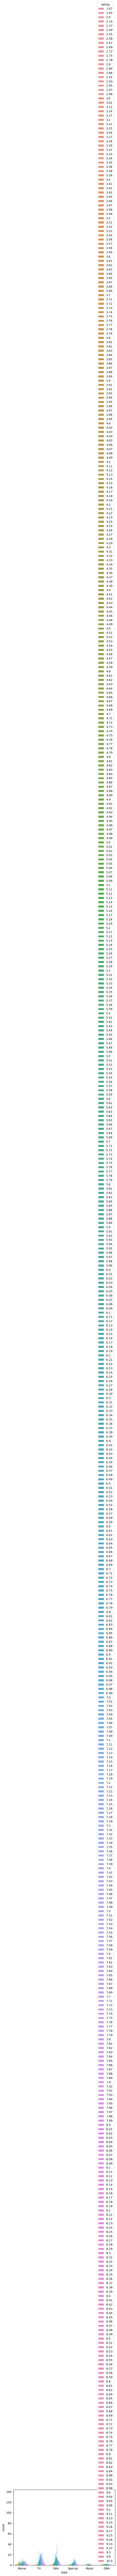

In [81]:
sns.countplot(x=df['type'],hue=df['rating'])

array([[<Axes: title={'center': 'anime_id'}>,
        <Axes: title={'center': 'rating'}>],
       [<Axes: title={'center': 'members'}>, <Axes: >]], dtype=object)

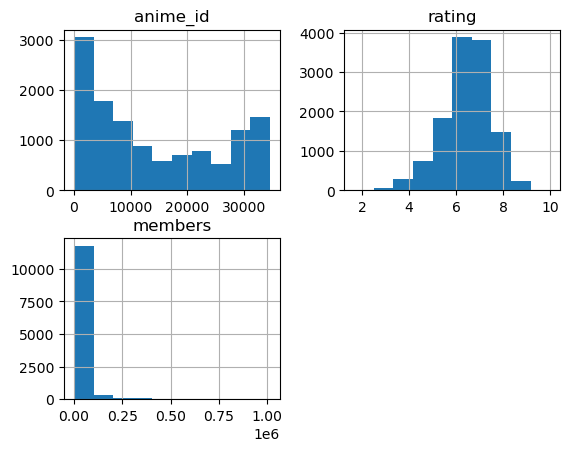

In [82]:
df.hist()

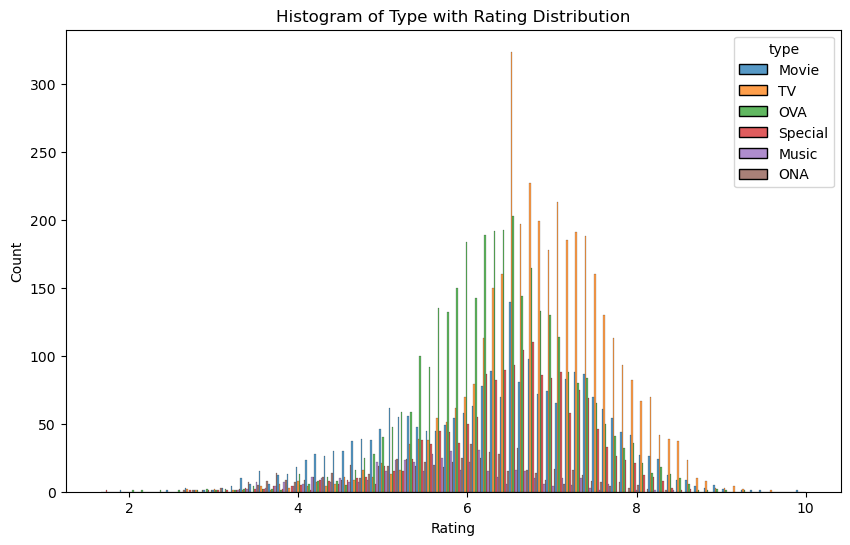

In [83]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=df, x='rating', hue='type',multiple='dodge')
plt.title('Histogram of Type with Rating Distribution')
plt.xlabel('Rating')
plt.show()

<Axes: xlabel='rating', ylabel='Count'>

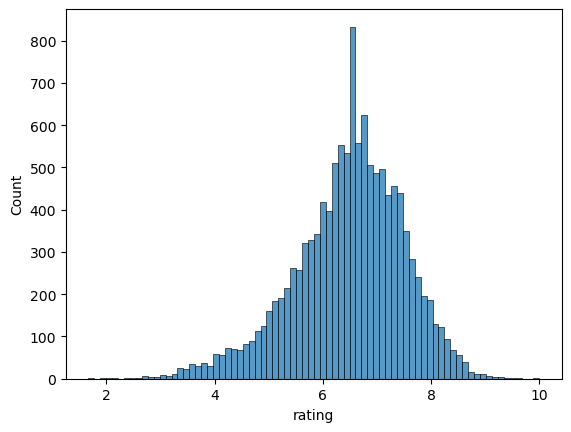

In [84]:
sns.histplot(data=df, x='rating')

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval

In [3]:
movies_df = pd.read_csv("imdb_5000_movies.csv")
credits_df = pd.read_csv("imdb_5000_credits.csv")
movies_df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [87]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [88]:
credits_df.columns = ['id','title','cast','crew']
movies_df = movies_df.merge(credits_df, on='id')
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [89]:
# Demographic Filtering
C = movies_df["vote_average"].mean()
m = movies_df["vote_count"].quantile(0.9)
print("C: ", C)
print("m: ", m)
new_movies_df = movies_df.copy().loc[movies_df["vote_count"] >= m]
print(new_movies_df.shape)


C:  6.092171559442016
m:  1838.4000000000015
(481, 23)


In [90]:
def weighted_rating(x, C=C, m=m):
    v = x["vote_count"]
    R = x["vote_average"]
    return (v/(v + m) * R) + (m/(v + m) * C)

In [96]:
new_movies_df["score"] = new_movies_df.apply(weighted_rating, axis=1)
new_movies_df = new_movies_df.sort_values('score', ascending=False)
new_movies_df[["title_x", "vote_count", "vote_average", "score"]].head()

,title_x,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239


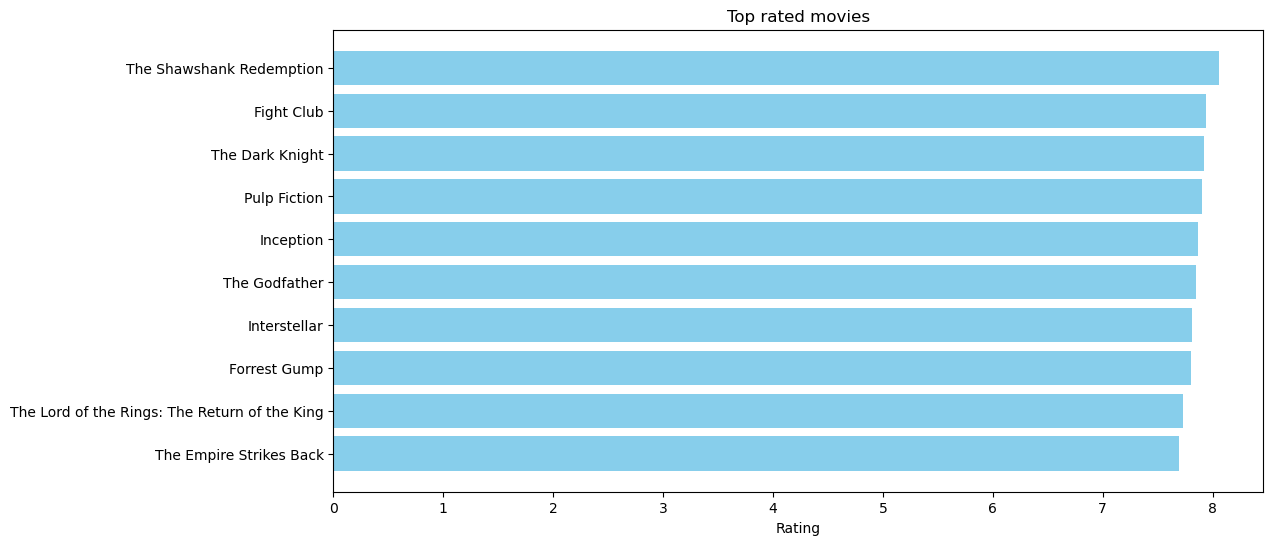

In [102]:
def plot():
    toprated = new_movies_df.sort_values("score", ascending=False)
    plt.figure(figsize=(12, 6))
    plt.barh(toprated["title_x"].head(10), toprated["score"].head(10), align="center", color="skyblue")
    plt.gca().invert_yaxis()
    plt.title("Top rated movies")
    plt.xlabel("Rating")
    plt.show()
plot()

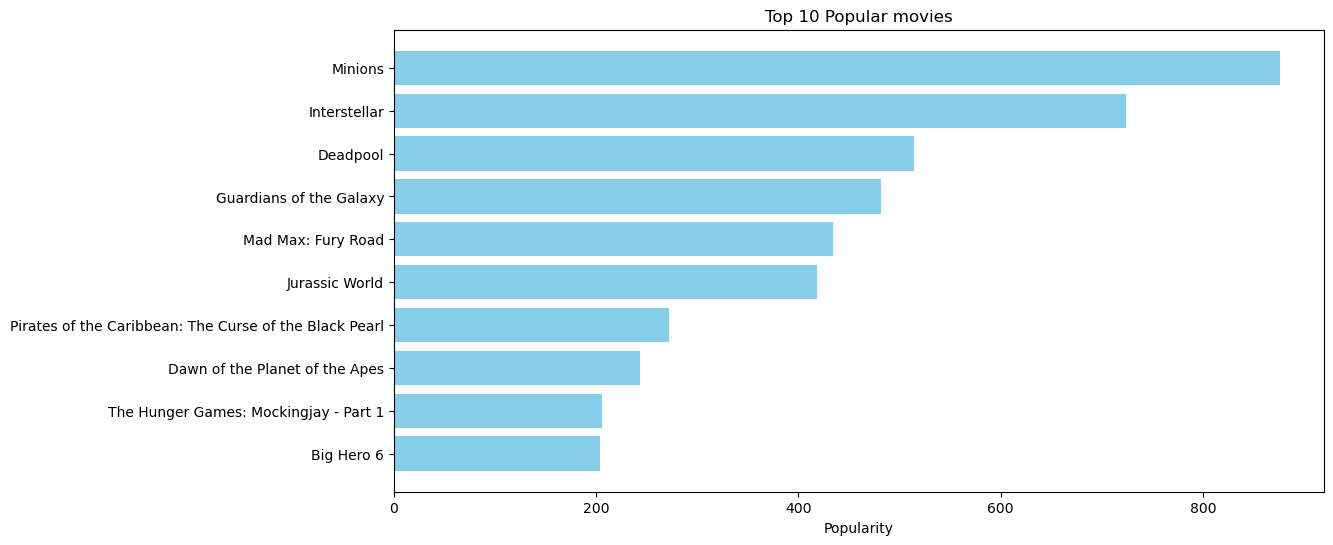

In [95]:
def plot():
    popularity = movies_df.sort_values("popularity", ascending=False)
    plt.figure(figsize=(12, 6))
    plt.barh(popularity["title_x"].head(10), popularity["popularity"].head(10), align="center", color="skyblue")
    plt.gca().invert_yaxis()
    plt.title("Top 10 Popular movies")
    plt.xlabel("Popularity")
    plt.show()
plot()

In [4]:
# Content-based Filtering
print(movies_df["overview"].head(5))
tfidf = TfidfVectorizer(stop_words="english")
movies_df["overview"] = movies_df["overview"].fillna("")
tfidf_matrix = tfidf.fit_transform(movies_df["overview"])
print(tfidf_matrix.shape)


0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object
(4803, 20978)


In [5]:
# Compute similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)
indices = pd.Series(movies_df.index, index=movies_df["title"]).drop_duplicates()
print(indices.head())

(4803, 4803)


<IPython.core.display.Javascript object>

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64


In [7]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movies_indices = [ind[0] for ind in sim_scores]
    movies = movies_df["title"].iloc[movies_indices]
    return movies
print("# Content Based Filtering - plot#")
print()
print("Recommendations for The Dark Knight Rises")
print(get_recommendations("The Dark Knight Rises"))
print()

# Content Based Filtering - plot#

Recommendations for The Dark Knight Rises
65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object



In [8]:
print("Recommendations for Avengers")
print(get_recommendations("The Avengers"))

Recommendations for Avengers
7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object
